In [41]:
install.packages("viridis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [78]:
library(tidyverse)
library(repr)
library(readxl)
library(viridis)
library(ggplot2)

In [79]:
original_data <- read_excel("Blue_Chip_Credit_Dataset.xlsx")
head(original_data)

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
768805383,Attrited Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716
713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010


In [80]:
cleaned_data <- original_data |>
filter(Education_Level != "Unknown", Marital_Status != "Unknown", Income_Category != "Unknown") |>
distinct()

head(cleaned_data)
nrow(cleaned_data)

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
768805383,Attrited Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716
713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010
710930508,Attrited Customer,21,M,3,College,Single,Less than $40K,Blue,36,5,2,0,22352


[1] 7315

In [81]:
attrited <- cleaned_data |>
filter(Attrition_Flag=="Attrited Customer")
nrow(attrited)

[1] 1733

In [82]:
existing <- cleaned_data |>
filter(Attrition_Flag=="Existing Customer")
nrow(existing)

[1] 5582

In [83]:
overall_rate = nrow(attrited)/nrow(cleaned_data)
overall_rate

[1] 0.2369105

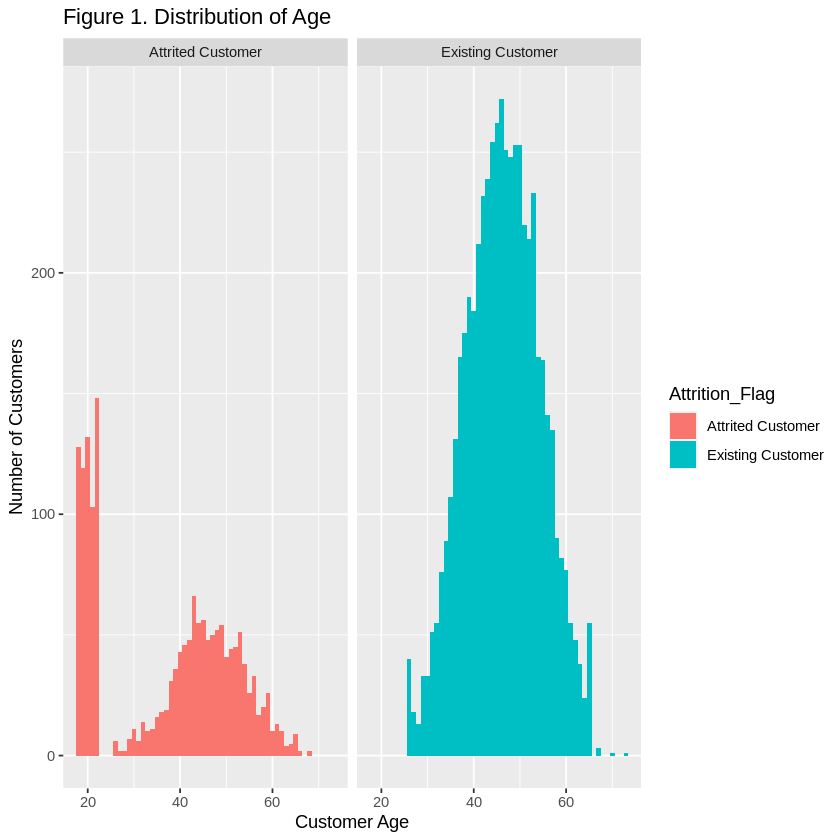

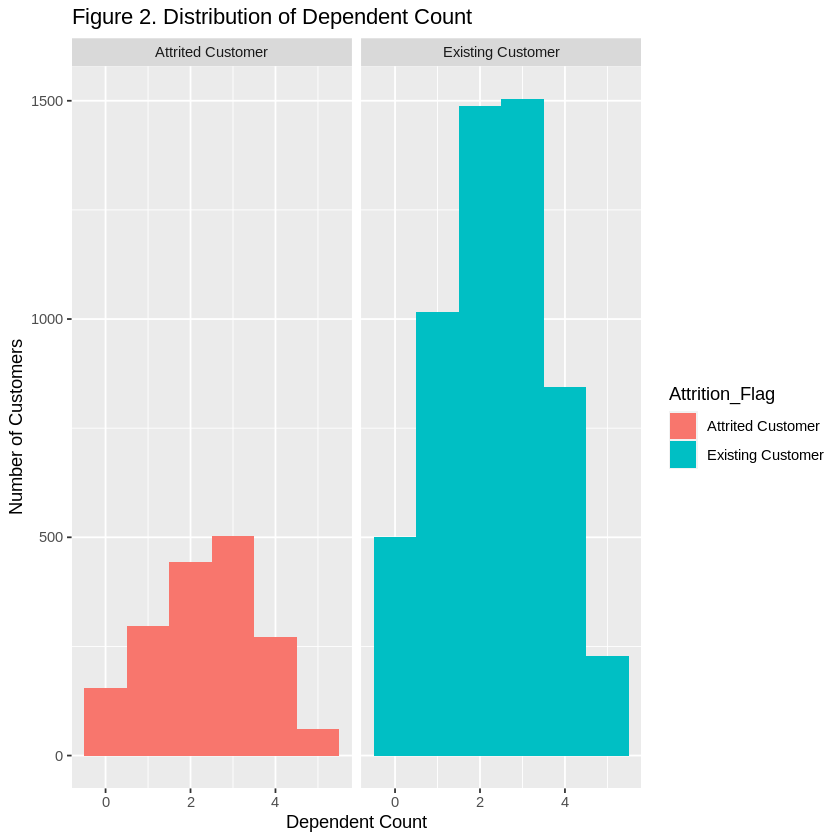

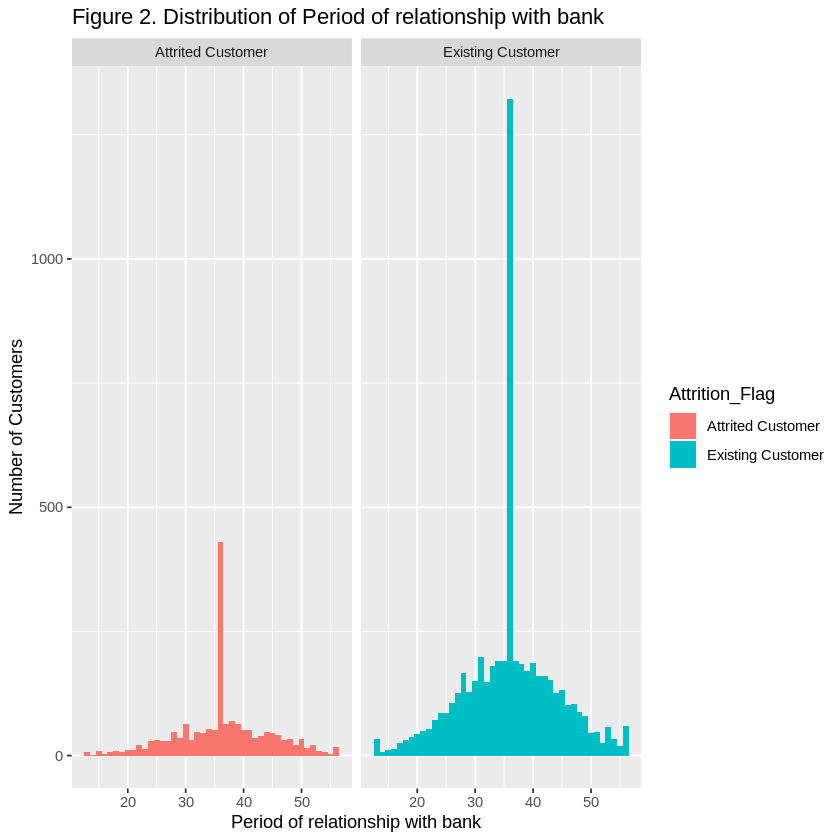

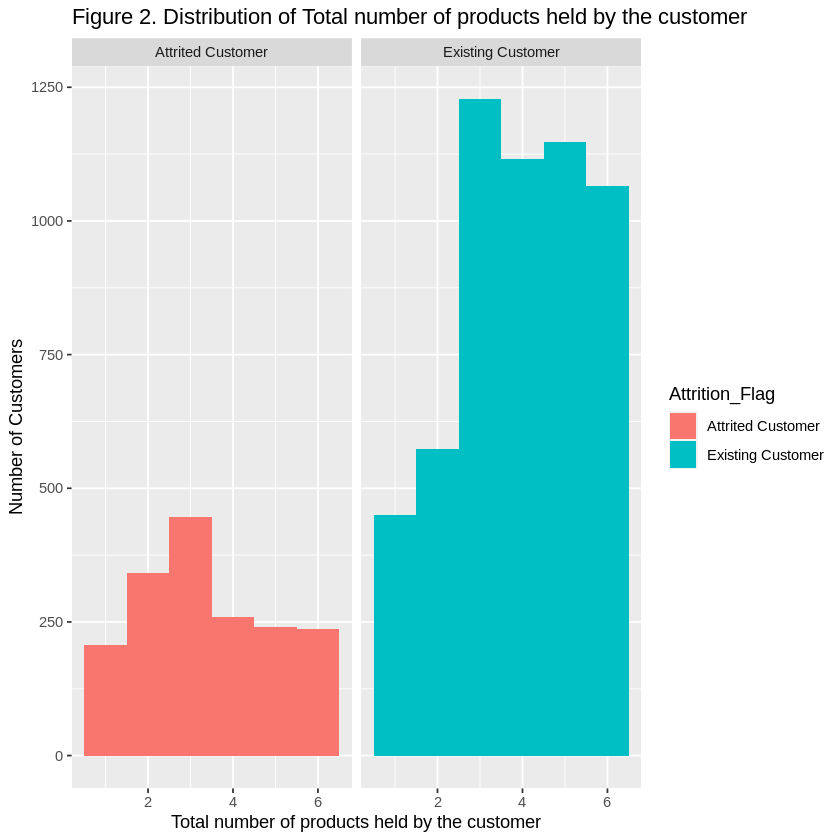

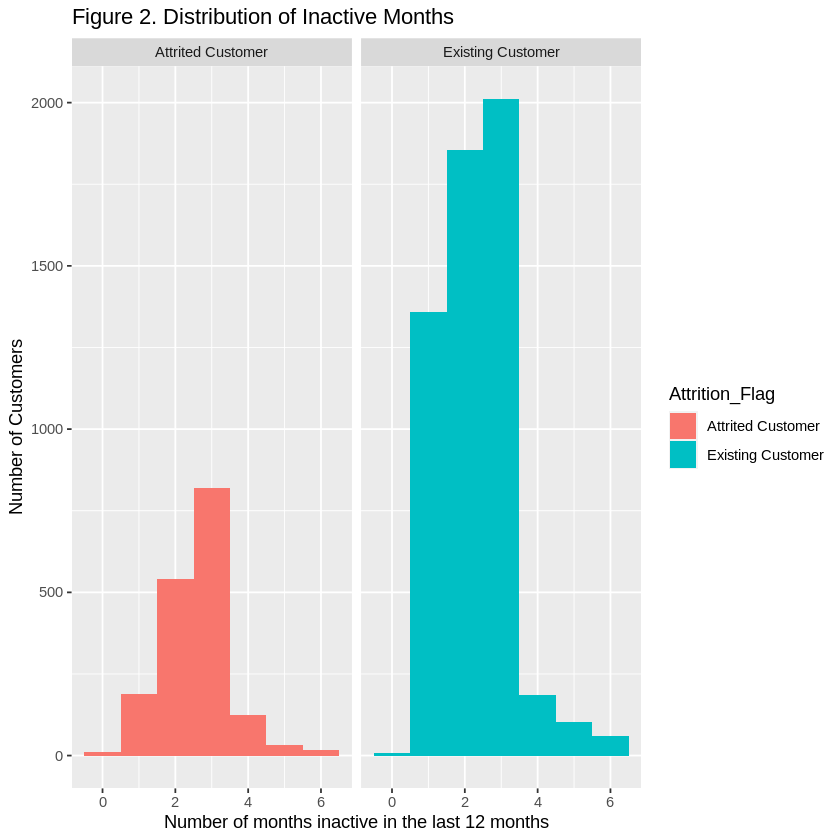

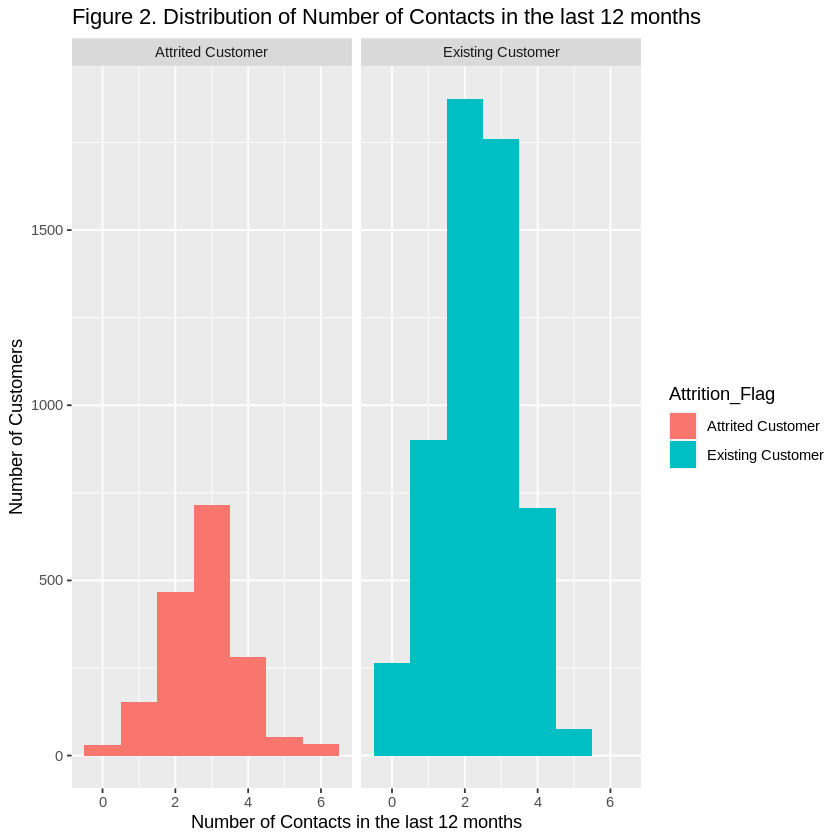

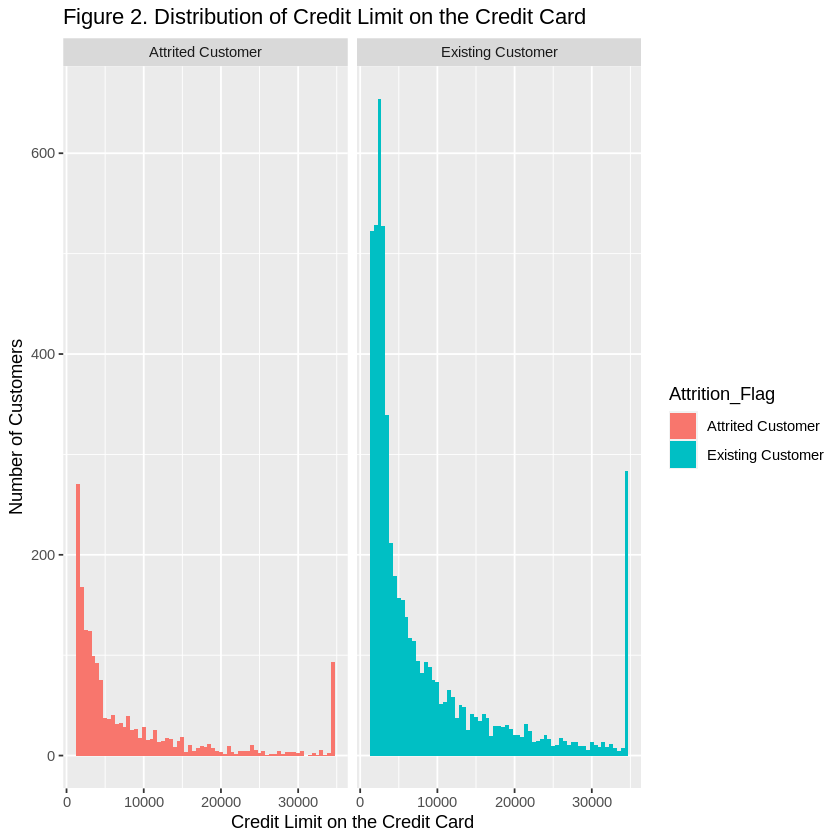

In [84]:
age <- cleaned_data |>
ggplot(aes(x= Customer_Age, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Customer Age",
     y="Number of Customers",
     title = "Figure 1. Distribution of Age")

dependent <- cleaned_data |>
ggplot(aes(x= Dependent_count, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Dependent Count",
     y="Number of Customers",
     title = "Figure 2. Distribution of Dependent Count")

months <- cleaned_data |>
ggplot(aes(x= Months_on_book, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Period of relationship with bank",
     y="Number of Customers",
     title = "Figure 2. Distribution of Period of relationship with bank")

relationships <- cleaned_data |>
ggplot(aes(x= Total_Relationship_Count, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Total number of products held by the customer",
     y="Number of Customers",
     title = "Figure 2. Distribution of Total number of products held by the customer")


inactive <- cleaned_data |>
ggplot(aes(x= Months_Inactive_12_mon, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Number of months inactive in the last 12 months",
     y="Number of Customers",
     title = "Figure 2. Distribution of Inactive Months")

contact <- cleaned_data |>
ggplot(aes(x= Contacts_Count_12_mon, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Number of Contacts in the last 12 months",
     y="Number of Customers",
     title = "Figure 2. Distribution of Number of Contacts in the last 12 months")

credit <- cleaned_data |>
ggplot(aes(x= Credit_Limit, fill = Attrition_Flag)) +
geom_histogram(binwidth = 500) +
facet_grid(~Attrition_Flag) +
labs(x="Credit Limit on the Credit Card",
     y="Number of Customers",
     title = "Figure 2. Distribution of Credit Limit on the Credit Card")


age
dependent
months
relationships
inactive
contact
credit

In [85]:
# modified_dataframe <- cleaned_data |>
# select(Income_Category, Marital_Status,Education_Level, Gender, Card_Category,Attrition_Flag) |>
# pivot_longer(cols=Income_Category:Card_Category, 
#              names_to = "Category",
#              values_to = "Status")


# head(modified_dataframe)

In [86]:
# circular_barplot <- modified_dataframe |>
# ggplot(aes(x= Status,
#            y= Attrition_Flag,
#           fill = Attrition_Flag)) +
# geom_bar(stat="identity") +
# coord_polar(start = 0)

# circular_barplot

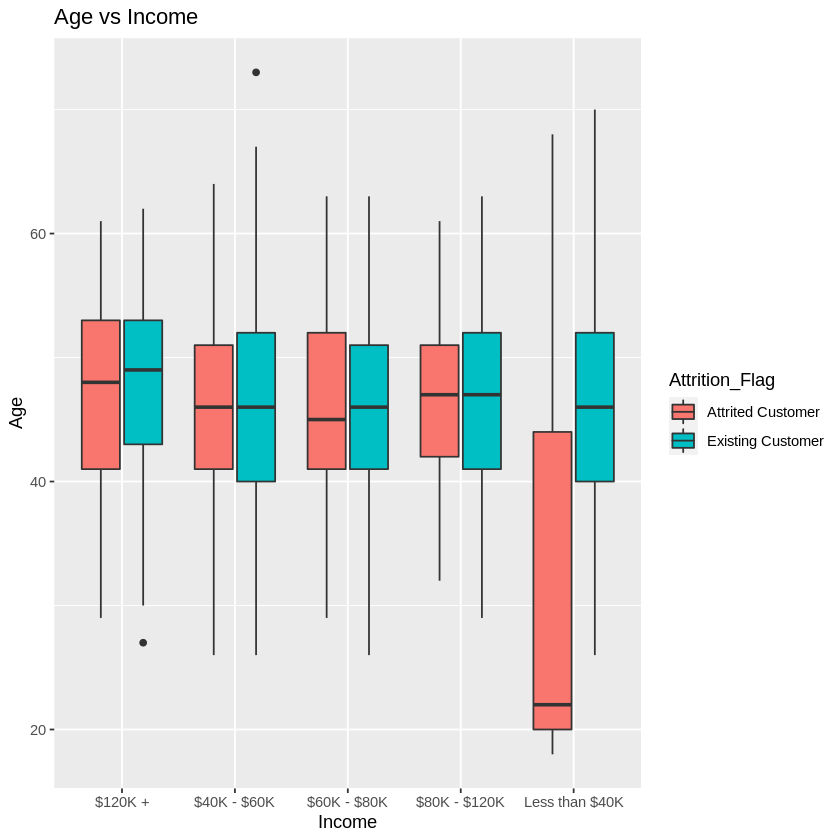

In [91]:
income_age <- cleaned_data |>
ggplot(aes(x=Income_Category, y=Customer_Age, fill=Attrition_Flag)) +
geom_boxplot() +
labs(x="Income", y="Age", title="Age vs Income")
income_age

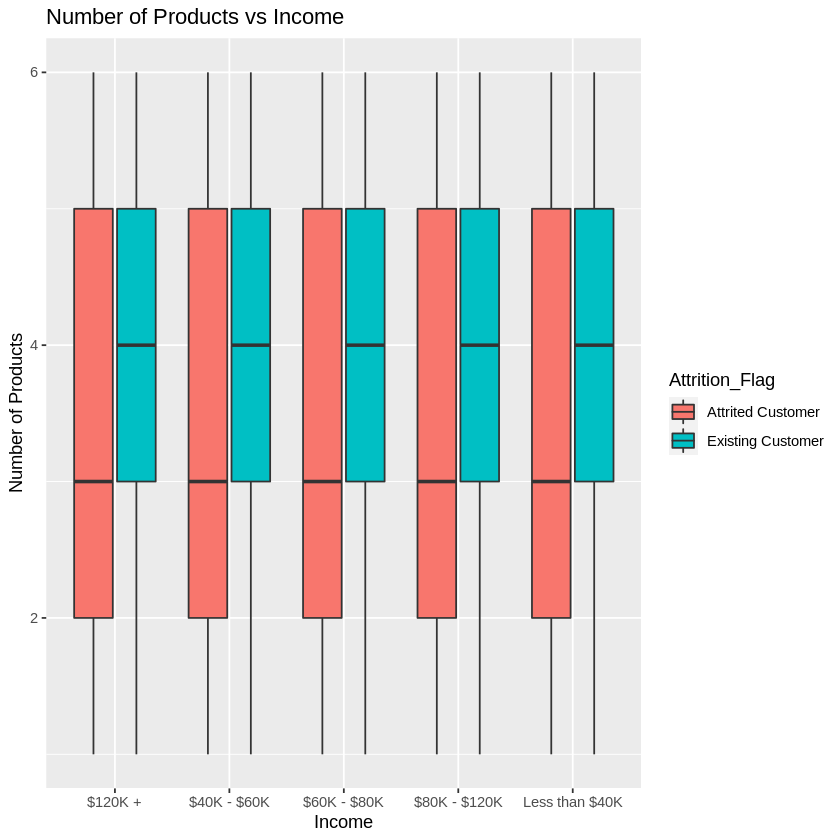

In [97]:
income_dependent <- cleaned_data |>
ggplot(aes(x=Income_Category, y=Total_Relationship_Count, fill=Attrition_Flag)) +
geom_boxplot() +
labs(x="Income", y="Number of Products", title="Number of Products vs Income")
income_dependent

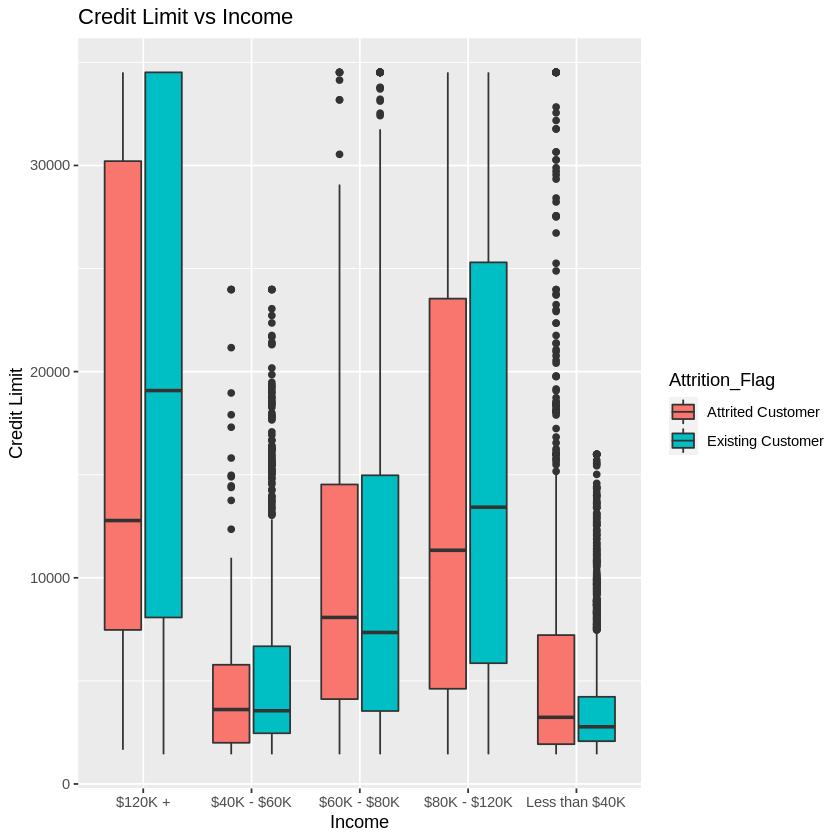

In [96]:
income_credit <- cleaned_data |>
ggplot(aes(x=Income_Category, y=Credit_Limit, fill=Attrition_Flag)) +
geom_boxplot() +
labs(x="Income", y="Credit Limit", title="Credit Limit vs Income")
income_credit